## Bagaimana Cara Memilih Jumlah Cluster

### Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

### Load the data

In [3]:
df = pd.read_csv('Countries.csv')
df

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
...,...,...,...
236,Samoa,-172.164851,-13.753243
237,Yemen,47.586762,15.909280
238,South Africa,25.083901,-29.000341
239,Zambia,27.774759,-13.458242


### Plot data

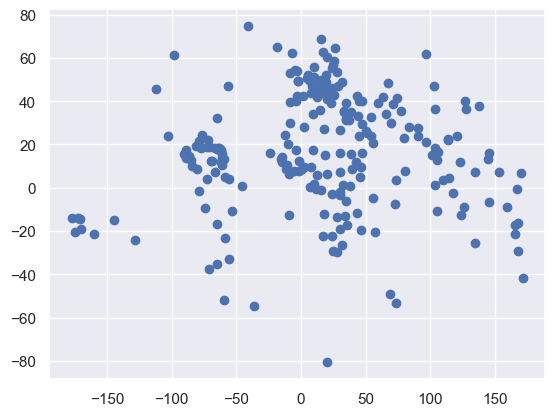

In [4]:
plt.scatter(df['Longitude'], df['Latitude'])
plt.show();

### Memilih feature

Sekarang saatnya menyiapkan data untuk pengelompokan. Kolom `Country` masih merupakan string pengidentifikasi unik, sehingga tidak akan berguna untuk pengelompokan, karena unik untuk setiap data.

clustering berdasarkan `Longitude` dan `Latitude`

In [5]:
X = df[['Longitude','Latitude']]
X

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


### Clustering

mencoba dengan 4 clusters.

In [6]:
kmeans = KMeans(4)

In [7]:
kmeans.fit(X)

KMeans(n_clusters=4)

### Hasil Clustering

In [8]:
clusters = kmeans.labels_
clusters

array([1, 0, 0, 1, 3, 3, 3, 0, 1, 0, 1, 0, 2, 0, 1, 2, 3, 0, 0, 3, 3, 3,
       2, 3, 0, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 2, 2, 0, 0, 3, 1, 2, 3, 0,
       0, 0, 1, 1, 0, 3, 1, 1, 1, 1, 3, 3, 3, 3, 0, 1, 3, 1, 3, 1, 0, 0,
       3, 3, 0, 3, 2, 1, 3, 3, 2, 0, 3, 0, 3, 3, 3, 3, 3, 0, 3, 1, 3, 1,
       2, 1, 2, 0, 1, 3, 1, 3, 2, 3, 0, 2, 0, 3, 0, 0, 3, 0, 3, 1, 3, 0,
       2, 0, 0, 0, 0, 2, 1, 1, 2, 3, 0, 2, 0, 3, 3, 1, 3, 0, 0, 3, 3, 3,
       2, 1, 3, 3, 3, 0, 0, 1, 2, 3, 3, 3, 2, 3, 2, 2, 0, 3, 1, 0, 0, 2,
       0, 2, 3, 2, 3, 1, 1, 3, 3, 0, 2, 2, 0, 0, 1, 1, 1, 2, 2, 2, 3, 1,
       2, 3, 1, 0, 1, 0, 3, 2, 0, 3, 0, 0, 0, 3, 2, 1, 3, 2, 3, 1, 3, 0,
       0, 1, 3, 0, 1, 3, 3, 3, 0, 1, 0, 0, 1, 0, 3, 2, 0, 0, 2, 1, 1, 3,
       3, 2, 0, 0, 3, 1, 1, 0, 3, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0])

In [9]:
data_with_clusters = df.copy()
data_with_clusters['Cluster'] = clusters
data_with_clusters

,name,Longitude,Latitude,Cluster
0,Aruba,-69.982677,12.520880,1
1,Afghanistan,66.004734,33.835231,0
2,Angola,17.537368,-12.293361,0
3,Anguilla,-63.064989,18.223959,1
4,Albania,20.049834,41.142450,3
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,1
237,Yemen,47.586762,15.909280,0
238,South Africa,25.083901,-29.000341,0
239,Zambia,27.774759,-13.458242,0


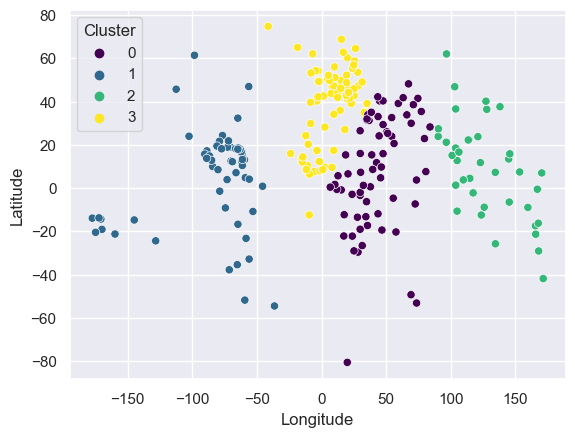

In [10]:
sns.scatterplot(x=data_with_clusters['Longitude'], y=data_with_clusters['Latitude'],
            hue=data_with_clusters['Cluster'], palette='viridis');

### Memilih jumlah cluster

#### SSD
SSD (Sum of Squared Distances) adalah ukuran evaluasi yang digunakan dalam algoritme k-means clustering untuk mengukur sejauh mana titik data dalam klaster berada dari pusat klasternya. SSD menggambarkan sejauh mana titik data tersebar di sekitar pusat klaster dan seberapa baik klaster tersebut mengelompokkan titik-titik data yang serupa.

Dalam k-means clustering, tujuan utamanya adalah untuk meminimalkan SSD. Semakin kecil nilai SSD, semakin baik klaster tersebut mengelompokkan data dengan baik, dengan titik-titik dalam klaster yang lebih dekat dengan pusat klasternya.

Dalam proses mencari jumlah klaster optimal (K) dalam algoritme k-means, elbow plot atau plot siku merupakan alat yang berguna. Elbow plot digunakan untuk mengidentifikasi titik di mana penurunan SSD mulai melambat secara signifikan saat jumlah klaster meningkat. Pada elbow plot, sumbu x mewakili jumlah klaster (K), sementara sumbu y mewakili SSD. Kurva elbow plot cenderung menunjukkan penurunan SSD yang cepat pada awalnya, tetapi kemudian menurun dengan laju yang lebih lambat seiring dengan peningkatan jumlah klaster. Titik di mana penurunan laju SSD menurun secara signifikan disebut "siku" dan menunjukkan jumlah klaster optimal yang dapat dipilih.

Selain elbow plot, bar plot yang menunjukkan perbedaan SSD dari klaster sebelumnya juga dapat digunakan. Bar plot ini dapat membantu melihat perbedaan penurunan SSD antara jumlah klaster berturut-turut, yang dapat memberikan indikasi apakah penambahan satu klaster lagi memberikan manfaat yang signifikan dalam pengelompokan data.

Dengan menggunakan kedua jenis plot ini, kita dapat memvisualisasikan dan memilih jumlah klaster yang optimal berdasarkan analisis perubahan SSD saat jumlah klaster bertambah, sehingga membantu dalam pengambilan keputusan tentang jumlah klaster yang sesuai untuk analisis k-means clustering.

In [11]:
kmeans.inertia_

256573.08675934296

Membuat loop yang menghitung dan menyimpan WCSS(Within-Cluster Sum of Squares) untuk sejumlah cluster dari 1 hingga 10 (atau lebih jika Anda mau).

In [12]:
wcss = []
# 'cl_num' untuk menentukan jumlah cluster tertinggi yang ingin kita gunakan untuk metode WCSS.
# Perhatikan bahwa dalam 'range' tidak termasuk batas atas
cl_num = 11
for i in range (1,cl_num):
    kmeans= KMeans(i)
    kmeans.fit(X)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [13]:
wcss

[1413859.6798344273,
 657012.0797586323,
 325235.522370559,
 256573.08675934296,
 192194.9829002524,
 151536.30336760034,
 128492.77062525427,
 102891.39703473676,
 84945.19461239543,
 76439.49644818818]

### Elbow Method

Text(0, 0.5, 'Within-cluster Sum of Squares')

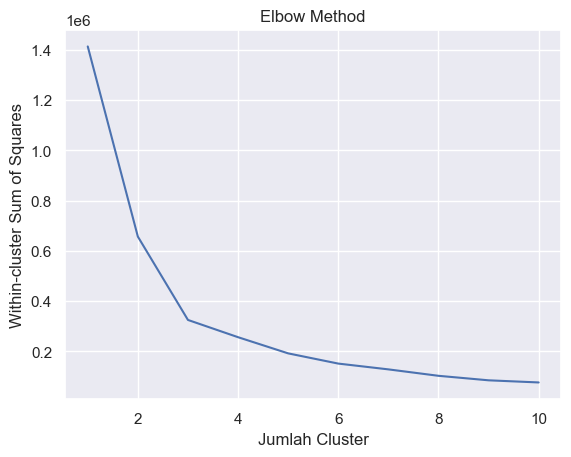

In [14]:
number_clusters = range(1,cl_num)
plt.plot(number_clusters, wcss)
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Within-cluster Sum of Squares')

Perhatikan titik "siku" pada elbow plot: Elbow plot biasanya menunjukkan penurunan SSD yang cepat pada awalnya, tetapi kemudian menurun dengan laju yang lebih lambat seiring dengan peningkatan jumlah klaster. Pilih jumlah klaster di titik di mana penurunan laju SSD mulai melambat secara signifikan dan membentuk "siku". Titik ini umumnya dianggap sebagai jumlah klaster yang optimal.

In [15]:
kmeans = KMeans(3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [16]:
clusters = kmeans.fit_predict(X)

In [17]:
data_with_clusters = df.copy()
data_with_clusters['Cluster'] = clusters

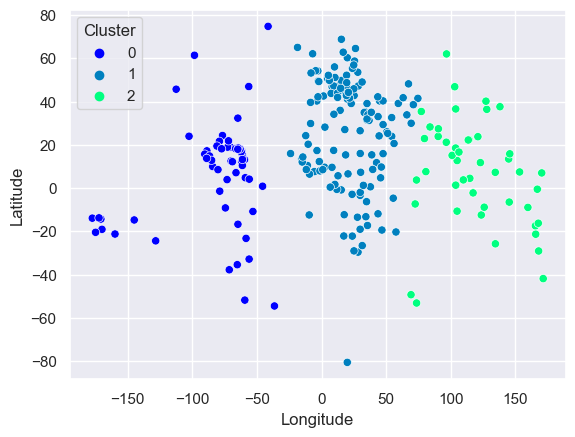

In [18]:
sns.scatterplot(x=data_with_clusters['Longitude'], y=data_with_clusters['Latitude'],
            hue=data_with_clusters['Cluster'], palette='winter');